# mor

1 0.9440389294403893
2 0.9537712895377128
3 0.9513381995133819
4 0.9391727493917275
5 0.9513381995133819
6 0.9464720194647201
7 0.9513381995133819
8 0.9416058394160584
9 0.9391727493917275
10 0.9416058394160584


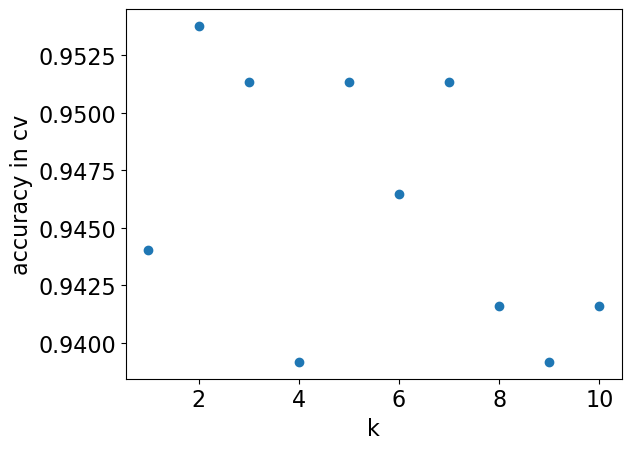

最適なk: 2


,false,mor
false,353,0
mor,14,44


,false,mor
false,115,3
mor,1,18


正解率(Accuracy) : 訓練 0.9659367396593674, 検証 0.9708029197080292
適合率(Precision) : 訓練 1.0, 検証 0.8571428571428571
再現率(Recall) : 訓練 0.7586206896551724, 検証 0.9473684210526315
F1スコア : 訓練 0.8627450980392157, 検証 0.9


In [1]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
max_number_of_k = 10
fold_number = 10
accuracy_in_cv_all = []
ks = [] 
for k in range(1, max_number_of_k + 1):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    estimated_y_in_cv = pd.DataFrame(cross_val_predict(model, autoscaled_x_train, y_train, cv=fold_number))
    accuracy_in_cv = metrics.accuracy_score(y_train, estimated_y_in_cv)
    print(k, accuracy_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    ks.append(k)

import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('accuracy in cv')
plt.show()
optimal_k = ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]
print(f"最適なk: {optimal_k}")
model = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="mor")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="mor")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="mor")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="mor")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="mor")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="mor")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

# jbw

1 0.9805352798053528
2 0.9732360097323601
3 0.9683698296836983
4 0.9586374695863747
5 0.9513381995133819
6 0.9659367396593674
7 0.9610705596107056
8 0.9610705596107056
9 0.9610705596107056
10 0.9586374695863747


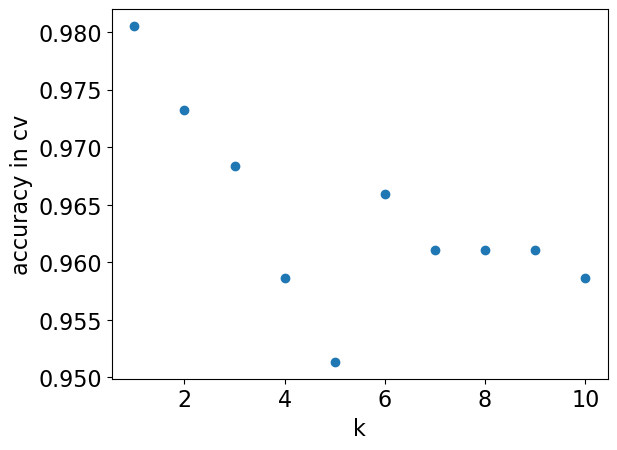

最適なk: 1


,false,jbw
false,394,0
jbw,0,17


,false,jbw
false,130,1
jbw,3,3


正解率(Accuracy) : 訓練 1.0, 検証 0.9708029197080292
適合率(Precision) : 訓練 1.0, 検証 0.75
再現率(Recall) : 訓練 1.0, 検証 0.5
F1スコア : 訓練 1.0, 検証 0.6


In [2]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 10]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
max_number_of_k = 10
fold_number = 10
accuracy_in_cv_all = []
ks = [] 
for k in range(1, max_number_of_k + 1):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    estimated_y_in_cv = pd.DataFrame(cross_val_predict(model, autoscaled_x_train, y_train, cv=fold_number))
    accuracy_in_cv = metrics.accuracy_score(y_train, estimated_y_in_cv)
    print(k, accuracy_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    ks.append(k)

import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('accuracy in cv')
plt.show()
optimal_k = ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]
print(f"最適なk: {optimal_k}")
model = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="jbw")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="jbw")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="jbw")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="jbw")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="jbw")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="jbw")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

# d6r

1 0.8223844282238443
2 0.7834549878345499
3 0.805352798053528
4 0.7883211678832117
5 0.7834549878345499
6 0.7737226277372263
7 0.7591240875912408
8 0.7493917274939172
9 0.754257907542579
10 0.7518248175182481


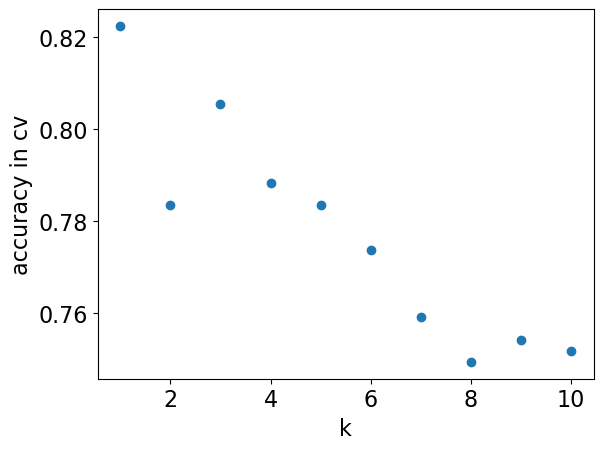

最適なk: 1


,d6r,false
d6r,136,0
false,2,273


,d6r,false
d6r,30,16
false,14,77


正解率(Accuracy) : 訓練 0.9951338199513382, 検証 0.781021897810219
適合率(Precision) : 訓練 0.9855072463768116, 検証 0.6818181818181818
再現率(Recall) : 訓練 1.0, 検証 0.6521739130434783
F1スコア : 訓練 0.9927007299270073, 検証 0.6666666666666666


In [3]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
max_number_of_k = 10
fold_number = 10
accuracy_in_cv_all = []
ks = [] 
for k in range(1, max_number_of_k + 1):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    estimated_y_in_cv = pd.DataFrame(cross_val_predict(model, autoscaled_x_train, y_train, cv=fold_number))
    accuracy_in_cv = metrics.accuracy_score(y_train, estimated_y_in_cv)
    print(k, accuracy_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    ks.append(k)

import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('accuracy in cv')
plt.show()
optimal_k = ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]
print(f"最適なk: {optimal_k}")
model = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d6r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d6r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d6r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d6r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d6r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d6r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

# d8r

1 0.9343065693430657
2 0.9051094890510949
3 0.9391727493917275
4 0.9440389294403893
5 0.9440389294403893
6 0.9367396593673966
7 0.9294403892944039
8 0.9318734793187348
9 0.927007299270073
10 0.9318734793187348


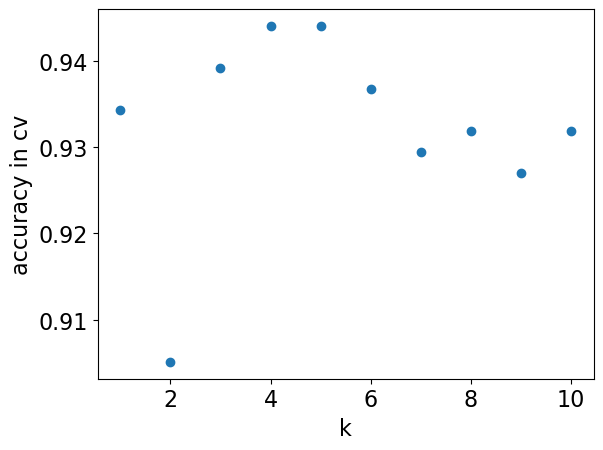

最適なk: 4


,d8r,false
d8r,35,11
false,6,359


,d8r,false
d8r,8,7
false,6,116


正解率(Accuracy) : 訓練 0.9586374695863747, 検証 0.9051094890510949
適合率(Precision) : 訓練 0.8536585365853658, 検証 0.5714285714285714
再現率(Recall) : 訓練 0.7608695652173914, 検証 0.5333333333333333
F1スコア : 訓練 0.8045977011494253, 検証 0.5517241379310345


In [4]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 12]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
max_number_of_k = 10
fold_number = 10
accuracy_in_cv_all = []
ks = [] 
for k in range(1, max_number_of_k + 1):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    estimated_y_in_cv = pd.DataFrame(cross_val_predict(model, autoscaled_x_train, y_train, cv=fold_number))
    accuracy_in_cv = metrics.accuracy_score(y_train, estimated_y_in_cv)
    print(k, accuracy_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    ks.append(k)

import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('accuracy in cv')
plt.show()
optimal_k = ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]
print(f"最適なk: {optimal_k}")
model = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d8r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d8r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d8r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d8r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d8r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d8r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

# can

1 0.878345498783455
2 0.8540145985401459
3 0.8467153284671532
4 0.8467153284671532
5 0.8540145985401459
6 0.8394160583941606
7 0.8418491484184915
8 0.8394160583941606
9 0.8394160583941606
10 0.8248175182481752


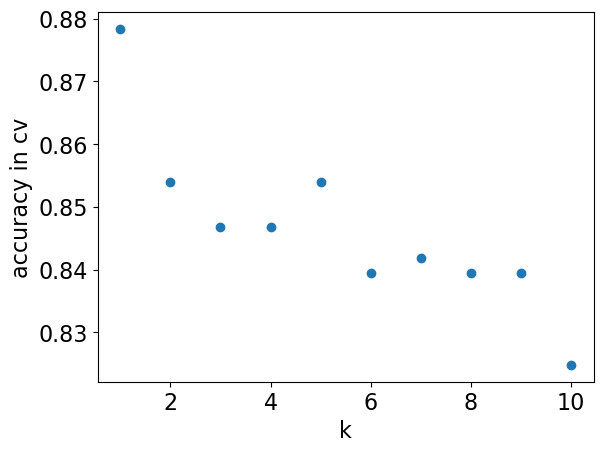

最適なk: 1


,can,false
can,83,0
false,1,327


,can,false
can,24,4
false,5,104


正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.9343065693430657
適合率(Precision) : 訓練 0.9880952380952381, 検証 0.8275862068965517
再現率(Recall) : 訓練 1.0, 検証 0.8571428571428571
F1スコア : 訓練 0.9940119760479041, 検証 0.8421052631578947


In [5]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 13]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
max_number_of_k = 10
fold_number = 10
accuracy_in_cv_all = []
ks = [] 
for k in range(1, max_number_of_k + 1):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    estimated_y_in_cv = pd.DataFrame(cross_val_predict(model, autoscaled_x_train, y_train, cv=fold_number))
    accuracy_in_cv = metrics.accuracy_score(y_train, estimated_y_in_cv)
    print(k, accuracy_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    ks.append(k)

import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('accuracy in cv')
plt.show()
optimal_k = ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]
print(f"最適なk: {optimal_k}")
model = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="can")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="can")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="can")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="can")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="can")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="can")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

# sod

1 0.9635036496350365
2 0.9635036496350365
3 0.9683698296836983
4 0.9635036496350365
5 0.9416058394160584
6 0.9367396593673966
7 0.9343065693430657
8 0.9440389294403893
9 0.9318734793187348
10 0.9343065693430657


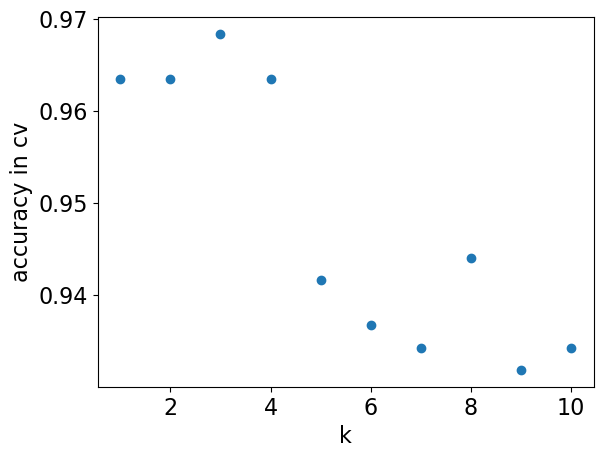

最適なk: 3


,false,sod
false,295,3
sod,2,111


,false,sod
false,96,3
sod,4,34


正解率(Accuracy) : 訓練 0.9878345498783455, 検証 0.948905109489051
適合率(Precision) : 訓練 0.9736842105263158, 検証 0.918918918918919
再現率(Recall) : 訓練 0.9823008849557522, 検証 0.8947368421052632
F1スコア : 訓練 0.9779735682819384, 検証 0.9066666666666666


In [6]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 14]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
max_number_of_k = 10
fold_number = 10
accuracy_in_cv_all = []
ks = [] 
for k in range(1, max_number_of_k + 1):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    estimated_y_in_cv = pd.DataFrame(cross_val_predict(model, autoscaled_x_train, y_train, cv=fold_number))
    accuracy_in_cv = metrics.accuracy_score(y_train, estimated_y_in_cv)
    print(k, accuracy_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    ks.append(k)

import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('accuracy in cv')
plt.show()
optimal_k = ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]
print(f"最適なk: {optimal_k}")
model = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="sod")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="sod")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="sod")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="sod")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="sod")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="sod")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

# lta

1 0.9099756690997567
2 0.9197080291970803
3 0.9075425790754258
4 0.9197080291970803
5 0.9172749391727494
6 0.9148418491484185
7 0.9124087591240876
8 0.9051094890510949
9 0.9002433090024331
10 0.902676399026764


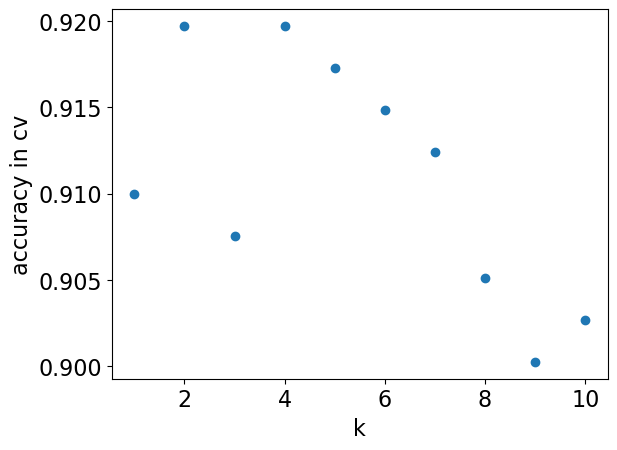

最適なk: 2


,false,lta
false,351,0
lta,17,43


,false,lta
false,115,2
lta,9,11


正解率(Accuracy) : 訓練 0.9586374695863747, 検証 0.9197080291970803
適合率(Precision) : 訓練 1.0, 検証 0.8461538461538461
再現率(Recall) : 訓練 0.7166666666666667, 検証 0.55
F1スコア : 訓練 0.8349514563106796, 検証 0.6666666666666666


In [7]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
max_number_of_k = 10
fold_number = 10
accuracy_in_cv_all = []
ks = [] 
for k in range(1, max_number_of_k + 1):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    estimated_y_in_cv = pd.DataFrame(cross_val_predict(model, autoscaled_x_train, y_train, cv=fold_number))
    accuracy_in_cv = metrics.accuracy_score(y_train, estimated_y_in_cv)
    print(k, accuracy_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    ks.append(k)

import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('accuracy in cv')
plt.show()
optimal_k = ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]
print(f"最適なk: {optimal_k}")
model = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="lta")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="lta")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="lta")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="lta")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="lta")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="lta")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")